<a href="https://colab.research.google.com/github/LondheShubham153/unsupervised_learning/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #data
import seaborn as sns #graphs
from sklearn.cluster import KMeans #ML
import matplotlib.pyplot as plt #graphs or viz
import numpy as np #stats

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


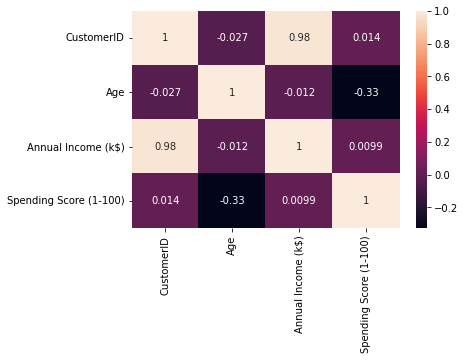

In [ ]:
sns.heatmap(df.corr(),annot=True)

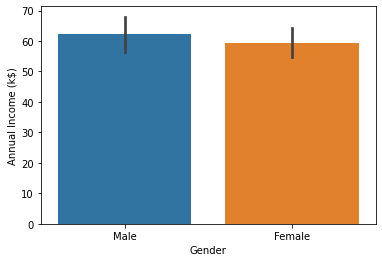

In [ ]:
sns.barplot(x = df['Gender'], y = "Annual Income (k$)", data = df)


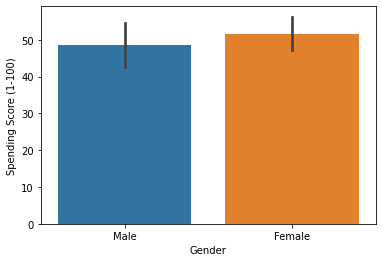

In [ ]:
sns.barplot(x = df['Gender'], y = "Spending Score (1-100)", data = df)

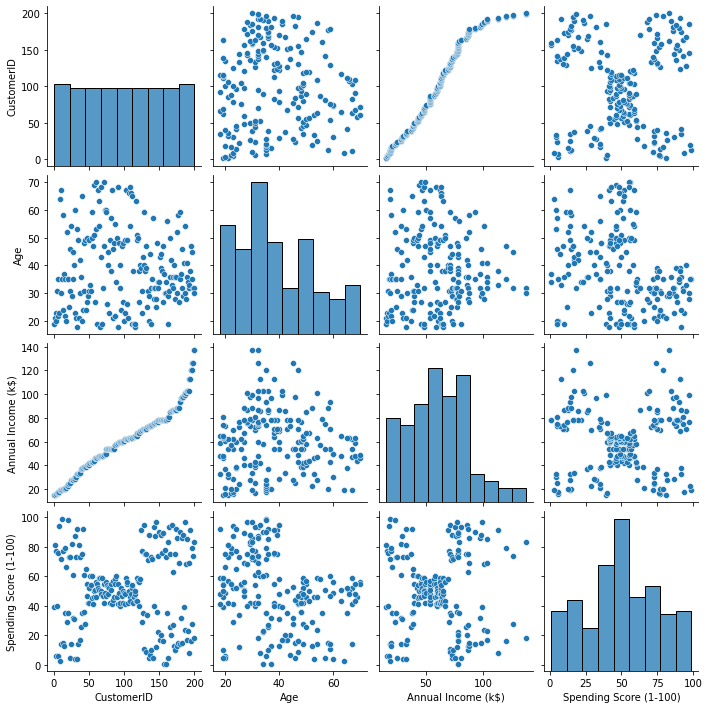

In [ ]:
sns.pairplot(df)

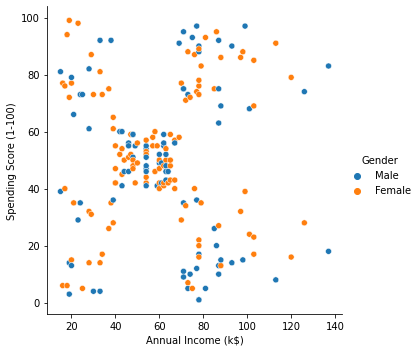

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="Gender", data=df)

## Finding out how many clusters to give for Kmeans

In [ ]:
clusters=[]
k_range = range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    clusters.append(km.inertia_)
    print(km.inertia_)

269981.28
183811.2827701642
106348.37306211122
73679.78903948836
44448.4554479337
37233.814510710006
30273.394312070042
25043.970949607214
21826.93630323166


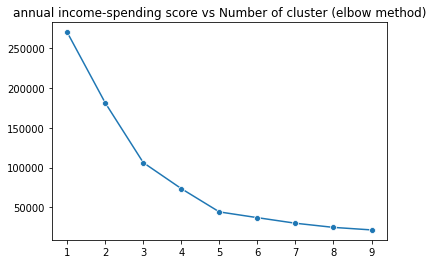

In [ ]:
plt.title("annual income-spending score vs Number of cluster (elbow method)")
sns.lineplot(x=k_range, y=clusters, marker="o")

In [ ]:
df2 = {'CustomerID': 201,'Gender':'Male', 'Age': 26, 'Annual Income (k$)': 80,'Spending Score (1-100)':20}
df = df.append(df2, ignore_index = True)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
model=KMeans(n_clusters=5)
df_pred=model.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Cluster_id'] = df_pred

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_id
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [ ]:
def label_clusters(cluster_id):
  labels = {
      0:"Rich",
      1:"Hesitant",
      2:"Careful",
      3:"Careless",
      4:"Fine"
  }
  return labels.get(cluster_id)

In [ ]:
df['customer_type'] = df['Cluster_id'].apply(label_clusters)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_id,customer_type
0,1,Male,19,15,39,4,Fine
1,2,Male,21,15,81,3,Careless
2,3,Female,20,16,6,4,Fine
3,4,Female,23,16,77,3,Careless
4,5,Female,31,17,40,4,Fine
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,Rich
196,197,Female,45,126,28,1,Hesitant
197,198,Male,32,126,74,0,Rich
198,199,Male,32,137,18,1,Hesitant


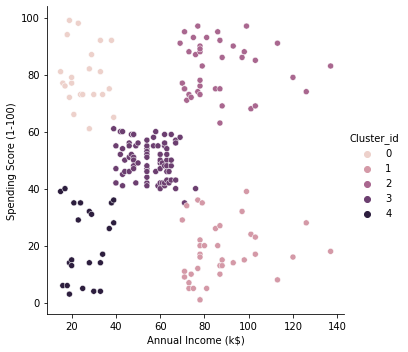

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="Cluster_id", data=df)